In [2]:
import itertools
import numpy as np
import healpy as hp
import sphere.distribution as sd

from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline


def sphe_to_cart(r, theta, phi):
    x = r*np.sin(theta)*np.cos(phi)    
    y = r*np.sin(theta)*np.sin(phi)
    z  = r*np.cos(theta)

    return x, y, z


def sphe_to_fb8(theta, phi):                                                                                                                                                                                                                 
    """ shift x,y,z->x2,x3,x1 which is the coordinate system used in fb8 1982

    return np.array((x1,x2,x3), ...) which is the format read-in by fb8_distribution
    """
    xyz = sphe_to_cart(1, theta, phi)
    xs = np.asarray((xyz[2], xyz[0], xyz[1])).T
    return xs


def fb8_map(fb8obj, nside):
    """Returns a map of the fb8 distribution's pdf in the specified
    coordinates                                                                                                                                                                                                                               
    """                                                                                                                                                                                                                                       
    npix = hp.nside2npix(nside)
    zen, azi = hp.pix2ang(nside, np.arange(npix))
    return fb8obj.pdf(sphe_to_fb8(zen, azi))

def plot_map(theta,phi,psi,kappa,beta,eta,alpha,rho, nside=64):
    pdf = sd.fb8(theta,phi,psi,kappa,beta,eta,alpha,rho)
    kmap = fb8_map(pdf,nside)
    thetas, phis = pdf.contour()
    
    vmap = cm.plasma
    vmap.set_under('w')
    vmap.set_bad('w')
    hp.mollview(kmap, title=r'$\kappa={}$, $\beta={}$, $\eta={}$'.format(kappa,beta,eta),
                min=0, max=np.round(np.nanmax(kmap),2),
                cmap=vmap,hold=True,cbar=True,xsize=1600)
    hp.graticule()
    hp.projplot(thetas, phis, '.', markersize=2)


In [ ]:
etas = [-1,-0.8,0,0.8,1]
betas = [0.1,1,5,10]
kappas = [0.1,1,5,10]

curr_kappa = 0
curr_ax = 0
for kappa, beta, eta in itertools.product(kappas, betas, etas):
    if kappa != curr_kappa:
        if curr_ax:
            plt.savefig('fig/k{}.png'.format(curr_kappa),bbox_inches='tight')
        fig, axes = plt.subplots(len(betas), len(etas), figsize=(7*len(etas),5*len(betas)), dpi=300)
        flat_axes = axes.flatten()
        curr_kappa = kappa
        curr_ax = 0
    plt.sca(flat_axes[curr_ax])
    plot_map(np.pi/2,0,0,kappa,beta,eta,1,0)
    curr_ax+=1
plt.savefig('fig/k{}.png'.format(kappa),bbox_inches='tight')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


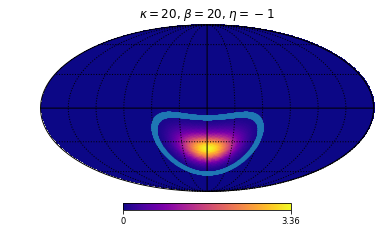

In [2]:
plot_map(1,0,0,20,20,-1,0.5,0)

In [3]:
for k, b, m in itertools.product(np.arange(0.1,41, 20),
                                 np.arange(0.1,41, 20),
                                 np.arange(-1, 1, 0.4)):
    nquad = sd.fb8(np.pi/2,0,0,k,b,m,1e-12,0.).normalize()
    nsum = sd.fb8(np.pi/2,0,0,k,b,m,0,0.).normalize()
    if (nquad-nsum)/nquad > 0.01:
        print k, b, m
        print nquad, nsum